In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

import requests
import glob


In [2]:
df1=pd.read_csv(r"C:\Users\admin\Downloads\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016 (1).csv")

In [3]:
df5=pd.read_csv(r"C:\Users\admin\Downloads\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016 (1).csv")
df1=pd.read_csv(r"c:\Users\admin\Downloads\ResaleFlatPricesBasedonApprovalDate19901999 (1).csv")
df2=pd.read_csv(r"c:\Users\admin\Downloads\ResaleFlatPricesBasedonApprovalDate2000Feb2012 (2).csv")
df3=pd.read_csv(r"c:\Users\admin\Downloads\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014 (1).csv")
df4=pd.read_csv(r"C:\Users\admin\Downloads\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016 (1).csv")
df5=pd.read_csv(r"c:\Users\admin\Downloads\ResaleflatpricesbasedonregistrationdatefromJan2017onwards (1).csv")

df=pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
924109,2024-03,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,855000.0,62 years 08 months
924110,2024-04,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,900000.0,62 years 10 months
924111,2024-04,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,805000.0,62 years 10 months
924112,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62 years 11 months


In [4]:
#spliting month column into month and year seperatly
df[['year','month']] = df['month'].str.split('-', expand=True)

#convert year and month columns to numeric types if needed
df['year'] = pd.to_numeric(df['year'])
df['month'] = pd.to_numeric(df['month'])

In [5]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
924109,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,855000.0,62 years 08 months,2024
924110,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,900000.0,62 years 10 months,2024
924111,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,805000.0,62 years 10 months,2024
924112,2,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62 years 11 months,2024


3 datasts do not having the 'remaining_lease' and thus when we merged all 5 datasetstogether we have Nan values on those rows. We use the below formula to obtain the values for those Nan values.

remaining lease = 99-(Year-lease commence date)

In [6]:
import pandas as pd
from datetime import datetime


current_year = datetime.now().year

# Calculate remaining_lease
df['remaining_lease'] = df['remaining_lease'].fillna(90 - (current_year - df['lease_commence_date']))

# Now check the DataFrame or perform further operations
print(df.head())


   month        town flat_type block       street_name storey_range  \
0      1  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1      1  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2      1  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3      1  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4      1  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0            31.0        IMPROVED                 1977        9000.0   
1            31.0        IMPROVED                 1977        6000.0   
2            31.0        IMPROVED                 1977        8000.0   
3            31.0        IMPROVED                 1977        6000.0   
4            73.0  NEW GENERATION                 1976       47200.0   

  remaining_lease  year  
0              43  1990  
1              43  1990  
2              43  1990  
3              43  1990  
4         

In [7]:
#calculate remaining lease for rows with values
df['remaining_lease'].fillna(90 - (df['year'] - df['lease_commence_date']), inplace=True)

In [8]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,43,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,43,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,43,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,43,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,42,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
924109,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,855000.0,62 years 08 months,2024
924110,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,900000.0,62 years 10 months,2024
924111,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,805000.0,62 years 10 months,2024
924112,2,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62 years 11 months,2024


In [9]:
#changing the case to uppercase for consistency
df['flat_model'] = df['flat_model'].str.upper()

In [10]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,43,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,43,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,43,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,43,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,42,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
924109,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,APARTMENT,1987,855000.0,62 years 08 months,2024
924110,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988,900000.0,62 years 10 months,2024
924111,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,APARTMENT,1988,805000.0,62 years 10 months,2024
924112,2,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,MULTI GENERATION,1987,998000.0,62 years 11 months,2024


In [11]:
#converting flat type values into lower case
df['flat_type'] = df['flat_type'].str.lower()

#Standedize values to a common set of categories
type_mapping = {
    '1 room': '1 room',
    '3 room': '3 room',
    '4 room': '4 room',
    '5 room': '5 room',
    '2 room': '2 room',
    'executive': 'executive',
    'multi generation': 'multi generation',
    'multi generation': 'multi generation'
}

df['flat_type'] = df['flat_type'].map(type_mapping)

# changing the case to upper case
df['flat_type'] = df['flat_type'].str.upper()

In [12]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,43,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,43,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,43,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,43,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,42,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
924109,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,APARTMENT,1987,855000.0,62 years 08 months,2024
924110,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988,900000.0,62 years 10 months,2024
924111,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,APARTMENT,1988,805000.0,62 years 10 months,2024
924112,2,YISHUN,NaN,666,YISHUN AVE 4,04 TO 06,164.0,MULTI GENERATION,1987,998000.0,62 years 11 months,2024


In [13]:
# Convert 'remaining_lease' column to numeric type
df['remaining_lease'] = pd.to_numeric(df['remaining_lease'], errors='coerce')

# Create a boolean mask to identify rows containing any of the specified values
mask = df['remaining_lease'] > 99

# Use the boolean mask to drop rows
df_combined = df[~mask]


In [14]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,43.0,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,43.0,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,43.0,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,43.0,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,42.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
924109,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,APARTMENT,1987,855000.0,NaN,2024
924110,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988,900000.0,NaN,2024
924111,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,APARTMENT,1988,805000.0,NaN,2024
924112,2,YISHUN,NaN,666,YISHUN AVE 4,04 TO 06,164.0,MULTI GENERATION,1987,998000.0,NaN,2024


In [15]:
#drop rows where the 'story_range' column contains specific values
values_to_drop = ['01 TO 05', '06 TO 10', '11 TO 15', '16 TO 20', '21 TO 25', '26 T0 30', '31 TO 35', '36 TO 40']

#create a boolean mask to identify rows containing any of the specified values
mask = df['storey_range'].isin(values_to_drop)

#Use the boolean mask to drop rows
df = df[~mask]

In [16]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,43.0,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,43.0,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,43.0,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,43.0,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,42.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
924109,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,APARTMENT,1987,855000.0,NaN,2024
924110,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988,900000.0,NaN,2024
924111,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,APARTMENT,1988,805000.0,NaN,2024
924112,2,YISHUN,NaN,666,YISHUN AVE 4,04 TO 06,164.0,MULTI GENERATION,1987,998000.0,NaN,2024


In [17]:
import pandas as pd

# Check for anomalies in 'storey_range'
anomaly_position = 160237
print(df.iloc[anomaly_position]['storey_range'])

# Split 'storey_range' into lower and upper bounds
df[['lower_bound', 'upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
def convert_to_numeric(value):
    try:
        return pd.to_numeric(value)
    except ValueError:
        # Handle specific cases where value cannot be converted
        return None

df['lower_bound'] = df['lower_bound'].apply(convert_to_numeric)
df['upper_bound'] = df['upper_bound'].apply(convert_to_numeric)


04 TO 06


In [19]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lower_bound,upper_bound
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,43.0,1990,10,12
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,43.0,1990,4,6
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,43.0,1990,10,12
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,43.0,1990,7,9
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,42.0,1990,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924109,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,APARTMENT,1987,855000.0,NaN,2024,7,9
924110,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988,900000.0,NaN,2024,4,6
924111,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,APARTMENT,1988,805000.0,NaN,2024,4,6
924112,2,YISHUN,NaN,666,YISHUN AVE 4,04 TO 06,164.0,MULTI GENERATION,1987,998000.0,NaN,2024,4,6


In [20]:
# Adding a new column 'price_per_sqm'
df['price_per_sqrm'] = df['resale_price'] / df['floor_area_sqm']

# Adding a new column 'year_holding'
df['year_holding'] = df['year'] - df['lease_commence_date']


#Adding a new Column 'Current_remaining_lease'
df['current_remaining_lease'] = df['remaining_lease'] - (2024 - df['year'])


In [21]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lower_bound,upper_bound,price_per_sqrm,year_holding,current_remaining_lease
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,43.0,1990,10,12,290.322581,13,9.0
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,43.0,1990,4,6,193.548387,13,9.0
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,43.0,1990,10,12,258.064516,13,9.0
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,43.0,1990,7,9,193.548387,13,9.0
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,42.0,1990,4,6,646.575342,14,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924109,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,APARTMENT,1987,855000.0,NaN,2024,7,9,6021.126761,37,NaN
924110,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988,900000.0,NaN,2024,4,6,6164.383562,36,NaN
924111,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,APARTMENT,1988,805000.0,NaN,2024,4,6,5669.014085,36,NaN
924112,2,YISHUN,NaN,666,YISHUN AVE 4,04 TO 06,164.0,MULTI GENERATION,1987,998000.0,NaN,2024,4,6,6085.365854,37,NaN


In [22]:
# Saving the cleaned dataset to a file
df = df.reset_index(drop=True)

#Use the boolean mask to drop rows_price
df.to_csv('Singapure_resale_flat_prices_updated.csv', index=False)

In [48]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,price_per_sqrm,year_holding,current_remaining_lease,lower_bound,upper_bound
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,43.0,1990,290.322581,13,9.0,10,12
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,43.0,1990,193.548387,13,9.0,4,6
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,43.0,1990,258.064516,13,9.0,10,12
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,43.0,1990,193.548387,13,9.0,7,9
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,42.0,1990,646.575342,14,8.0,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917310,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,APARTMENT,1987,855000.0,NaN,2024,6021.126761,37,NaN,7,9
917311,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988,900000.0,NaN,2024,6164.383562,36,NaN,4,6
917312,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,APARTMENT,1988,805000.0,NaN,2024,5669.014085,36,NaN,4,6
917313,2,YISHUN,NaN,666,YISHUN AVE 4,04 TO 06,164.0,MULTI GENERATION,1987,998000.0,NaN,2024,6085.365854,37,NaN,4,6


Data CLeaning

In [49]:
#Reading the  dataset
df_data = pd.read_csv('Singapure_resale_flat_prices_updated.csv')

#Display basic information about the dataset
print(df_data.info())

#Display summery statistics of numerical columns
print(df_data.describe())

#Display the first few rows of the datset
print(df_data.head())

#Check for missing values
print(df_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917315 entries, 0 to 917314
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    917315 non-null  int64  
 1   town                     917315 non-null  object 
 2   flat_type                917057 non-null  object 
 3   block                    917315 non-null  object 
 4   street_name              917315 non-null  object 
 5   storey_range             917315 non-null  object 
 6   floor_area_sqm           917315 non-null  float64
 7   flat_model               917315 non-null  object 
 8   lease_commence_date      917315 non-null  int64  
 9   resale_price             917315 non-null  float64
 10  remaining_lease          739404 non-null  float64
 11  year                     917315 non-null  int64  
 12  price_per_sqrm           917315 non-null  float64
 13  year_holding             917315 non-null  int64  
 14  curr

In [50]:
df_data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,price_per_sqrm,year_holding,current_remaining_lease,lower_bound,upper_bound
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,43.0,1990,290.322581,13,9.0,10,12
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,43.0,1990,193.548387,13,9.0,4,6
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,43.0,1990,258.064516,13,9.0,10,12
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,43.0,1990,193.548387,13,9.0,7,9
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,42.0,1990,646.575342,14,8.0,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917310,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,APARTMENT,1987,855000.0,NaN,2024,6021.126761,37,NaN,7,9
917311,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988,900000.0,NaN,2024,6164.383562,36,NaN,4,6
917312,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,APARTMENT,1988,805000.0,NaN,2024,5669.014085,36,NaN,4,6
917313,2,YISHUN,NaN,666,YISHUN AVE 4,04 TO 06,164.0,MULTI GENERATION,1987,998000.0,NaN,2024,6085.365854,37,NaN,4,6


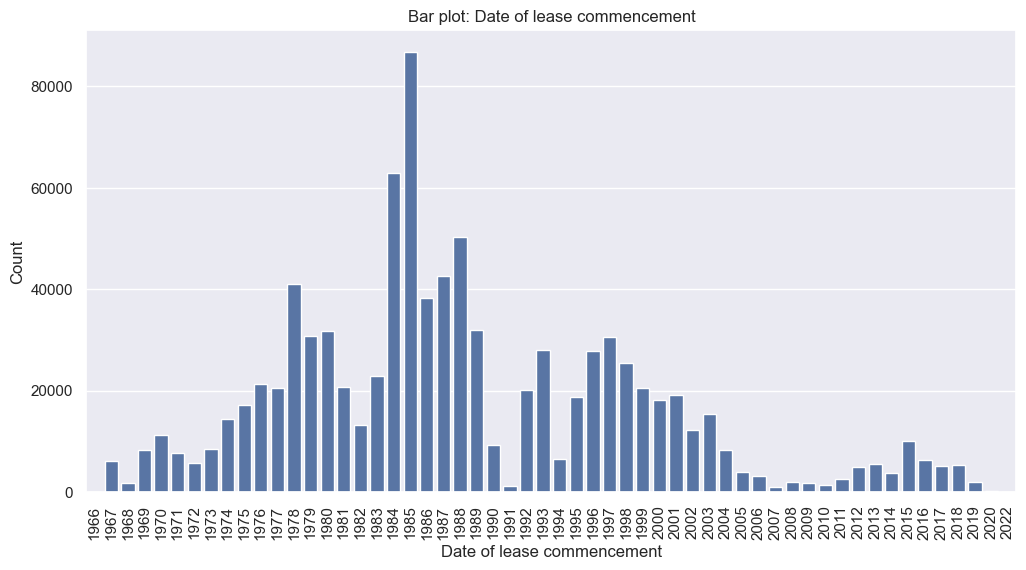

In [51]:
import matplotlib.pyplot as plt  # Import matplotlib.pyplot

plt.figure(figsize=(12, 6))
sns.countplot(x='lease_commence_date', data=df_data)
plt.title('Bar plot: Date of lease commencement')
plt.xlabel('Date of lease commencement')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


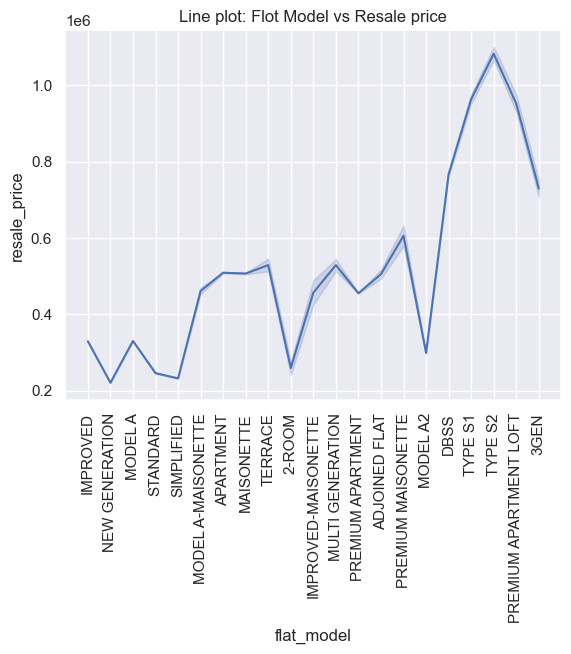

In [52]:
#Line plot
#print(df.columns)

sns.lineplot(x='flat_model', y='resale_price', data=df_data)
plt.title('Line plot: Flot Model vs Resale price')
plt.xticks(rotation=90)
plt.show()

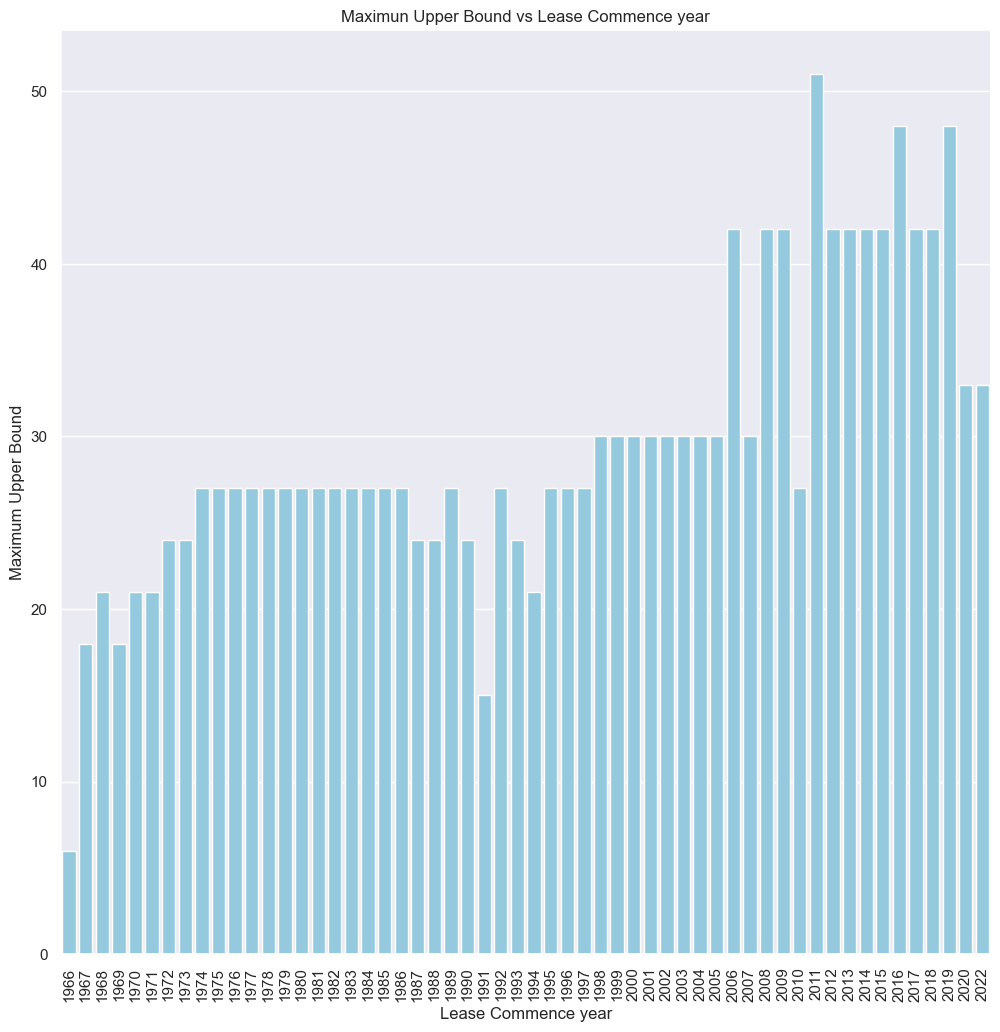

In [53]:
plt.figure(figsize=(12, 12))

#Group by lease_commence_year and find the maximun value of upper_bound for each group
max_upper_bound = df_data.groupby('lease_commence_date')['upper_bound'].max().reset_index()

#Create a bar plot using seaborn
sns.barplot(x='lease_commence_date', y='upper_bound', data=max_upper_bound,color='skyblue')

#Set plot label and title
plt.title('Maximun Upper Bound vs Lease Commence year')
plt.xlabel('Lease Commence year')
plt.ylabel('Maximum Upper Bound')
plt.xticks(rotation=90)

#show the plot
plt.show()

Model Building and Evaluation

Linear Regression

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame containing the relevant columns
#--->1:DATA PREPARATION
selected_columns = ['year', 'flat_type', 'flat_model', 'storey_range', 'floor_area_sqm',
                    'lease_commence_date', 'remaining_lease', 'current_remaining_lease',
                    'year_holding', 'resale_price']
dftrain = df[selected_columns]

# Separate feature (X) and target variable (y)
X = dftrain.drop('resale_price', axis=1)  # Features
y = dftrain['resale_price']                # Target variable

# Check for and handle missing values in X and y
missing_values_X = X.isnull().sum()
missing_values_y = y.isnull().sum()

# Drop rows with NaN values in both X and y
#2:--->HANDLING MISSING VALUES in X AND y
combined_df = pd.concat([X, y], axis=1)
combined_df_cleaned = combined_df.dropna()
X_cleaned = combined_df_cleaned.drop('resale_price', axis=1)
y_cleaned = combined_df_cleaned['resale_price']

# Split the cleaned data into training and testing sets
#Step 4: SPLIT THE DATA INTO TRAINING AND TESTING
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Define preprocessing steps for numeric and categorical features
#Step 5: DEFINE PROCCESSING STEPS AND PIPELINE
numeric_features = ['floor_area_sqm', 'lease_commence_date', 'remaining_lease', 'current_remaining_lease', 'year_holding']
categorical_features = ['year', 'flat_type', 'flat_model', 'storey_range']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine numeric and categorical transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Instantiate the regression model
model = LinearRegression()

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline on the preprocessed training data
#Step 6: FIT THE PIPELINE
pipeline.fit(X_train, y_train)

# Evaluate the model on the test data
score = pipeline.score(X_test, y_test)
print(f"R^2 score: {score:.2f}")


R^2 score: 0.86


Decision trees

K-Nearest neighbers


In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
#Create the regression model
model = KNeighborsRegressor()

#Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor ),('model', model)])

#Fit the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['floor_area_sqm',
                                                   'lease_commence_date',
                                                   'remaining_lease',
                                                   'current_remaining_lease',
                                                   'year_holding']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['year', 'flat_type',
                                                   'flat_model',
                                                   'storey_range'])])),
                ('model', KNeighborsRegressor())])

In [57]:
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evalute the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)  # Calculate mean squared error
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)





In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np  # Import numpy for sqrt function

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Use np.sqrt() to calculate RMSE
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Explained Variance Score: {explained_variance:.2f}")

